# <center>~ Pittsburgh Flight Data Explanatory Analysis ~</center>
## <center>An exploration into Delay Flights in Pittsburgh, PA in 2007</center>
<p><em>Created by Miles Murphy</em></p>
<em>November 11, 2020</em>

## Introduction: <a name="introduction"></a>

The following analysis will build upon the Exploratory analysis conducted on US Flight Data. The previous analysis focused on understand the basic nature of the flight data and then focusing in on flight data in Pittsburgh, PA in the years 1988 and 2007. This years are arbitrarily chosen from a data perspective, but are very important to the analyst's life as they are the year of his birth in Pittsburgh and the year he left Pittsburgh as an 18 year old "adult". 

Now, after being created and cleaned in the exploratory analysis, this delays subdataset features just flights in Pittsburgh in 2007 which experience delays from one (or more) of 5 delay types; Carrier, Weather, NAS (National Air System), Security, and Late Aircraft delays. The following exploratory analysis will look at some basic features of this dataframe with univariate analysis and then expand upon those features with bivariate or multivariate figures. 

# Table of Contents:
1. [Introduction](#introduction)
2. [Project Background](#project_background)
    1. [Data Source Information](#data_source_information)
    2. [Dataframe Basic Information](#dataframe_information)
3. [Explanatory Analysis](#explanatory_analysis)
    1. [Univariate Exploration](#univariate_exploration)
        a. [Most Popular Month to Fly](#popular_month)
        b. [Most Popular Day of the Week to Fly](#popular_day)
    2. [Bivariate Exploration](#bivariate_exploration)
    3. [Multivariate Exploration](#multivariate_exploration)
5. [Project Conclusions and Results](#project_conclusions)


## Project Background: <a name="project_background"></a>

This explanatory data analysis is part of the larger Udacity Data Analyst Nanodegree. The final project for the Data Visualization process involves the exploratory and explanatory analysis of a dataset. US Flight data was one of the provided options.

### Data Source Information: <a name="data_source_information"></a>

The US flight data utilized in both the exploratory analysis and this explanatory analysis of delayed flights in Pittsburgh all come from the original datasets colelcted by the United States Department of Transportation, Bureau of Transportation Statistics. The Bureau has been collecting data about the 'on-time' performance of all flights from 1987 to the present. The exploratory analysis originally explored flight data from both 1988 and 2007, but for the explanatory analysis that original dataset has been reduced to just flights from 2007 which departed from or originated in Pittsburgh, PA and experienced delays. 

In [1]:
#Import packages and set plots to be embedded
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#Credit to https://stackoverflow.com/questions/40105796/turn-warning-off-in-a-cell-jupyter-notebook
#This line of code was utitlized as a known bug for matplotlib was printing with a figure on slides and ruining the presentation
#import warnings
#warnings.filterwarnings('ignore')
#warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
#Create df
pit_delays = pd.read_csv("pittsburgh_07_delays.csv")

### Dataframe Basic Information <a name="dataframe_information"></a>

In [3]:
pit_delays.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DelayType
0,2007,1,2,2,15:04:00,14:35:00,22:19:00,21:40:00,WN,2659,...,8,0,NaN,0,0,29,10,0,0,"Weather, NAS"
1,2007,1,2,2,14:00:00,13:35:00,16:08:00,15:50:00,WN,304,...,7,0,NaN,0,10,0,0,0,8,"Carrier, Late Aircraft"
2,2007,1,2,2,17:30:00,16:55:00,19:39:00,19:15:00,WN,723,...,11,0,NaN,0,4,0,0,0,20,"Carrier, Late Aircraft"
3,2007,1,2,2,18:36:00,18:10:00,19:55:00,19:25:00,WN,1597,...,25,0,NaN,0,2,0,4,0,24,"Carrier, NAS, Late Aircraft"
4,2007,1,2,2,15:55:00,14:50:00,21:45:00,20:55:00,WN,647,...,9,0,NaN,0,43,0,0,0,7,"Carrier, Late Aircraft"


In [4]:
pit_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25515 entries, 0 to 25514
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               25515 non-null  int64  
 1   Month              25515 non-null  int64  
 2   DayofMonth         25515 non-null  int64  
 3   DayOfWeek          25515 non-null  int64  
 4   DepTime            25506 non-null  object 
 5   CRSDepTime         25515 non-null  object 
 6   ArrTime            25495 non-null  object 
 7   CRSArrTime         25515 non-null  object 
 8   UniqueCarrier      25515 non-null  object 
 9   FlightNum          25515 non-null  int64  
 10  TailNum            25515 non-null  object 
 11  ActualElapsedTime  25515 non-null  float64
 12  CRSElapsedTime     25515 non-null  float64
 13  AirTime            25515 non-null  float64
 14  ArrDelay           25515 non-null  float64
 15  DepDelay           25515 non-null  float64
 16  Origin             255

In [5]:
pit_delays.describe()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,25515.0,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,...,25515.000000,25515.000000,25515.0,0.0,25515.0,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000
mean,2007.0,6.233431,15.800235,3.886106,2599.530159,125.724397,116.547208,92.386518,52.203371,43.026181,...,7.946502,25.391378,0.0,NaN,0.0,13.091593,2.703194,15.728317,0.076426,20.603841
std,0.0,3.476602,8.597204,1.960544,1888.638510,57.601936,53.804844,56.475078,42.085848,44.574080,...,6.634130,20.100771,0.0,NaN,0.0,26.048881,14.316517,25.863651,1.574033,34.951583
min,2007.0,1.000000,1.000000,1.000000,1.000000,32.000000,50.000000,0.000000,15.000000,-29.000000,...,0.000000,1.000000,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.0,3.000000,8.000000,2.000000,1058.000000,86.000000,83.000000,57.000000,23.000000,11.000000,...,5.000000,13.000000,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.0,6.000000,16.000000,4.000000,1830.000000,108.000000,99.000000,70.000000,36.000000,31.000000,...,6.000000,19.000000,0.0,NaN,0.0,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2007.0,9.000000,23.000000,5.000000,3750.000000,152.000000,135.000000,116.000000,66.000000,61.000000,...,9.000000,31.000000,0.0,NaN,0.0,16.000000,0.000000,21.000000,0.000000,28.000000
max,2007.0,12.000000,31.000000,7.000000,7497.000000,460.000000,343.000000,368.000000,355.000000,367.000000,...,160.000000,227.000000,0.0,NaN,0.0,200.000000,200.000000,200.000000,130.000000,200.000000


This dataframe consists of 30 columns featuring 25,515 rows of flight data for flights to and from Pittsburgh, PA in 2007 which experienced delays. It should be noted that the CancellationCode column has zero non-null values, as none of these flights were cancelled. Normally that column would be dropped in a cleaning process, but instead it will just be ignored as it will not impact this explanatory visual analysis.

## Explanatory Analysis <a name="explanatory_analysis"></a>

### Univariate Analysis <a name="univariate_analysis"></a>

The first few figures will create some basic visualizations to show simple information about the dataset prior to the more detailed/insightful bivariate and multivariate analysis.

#### a. Most Popular Month to Fly <a name="popular_month"></a>

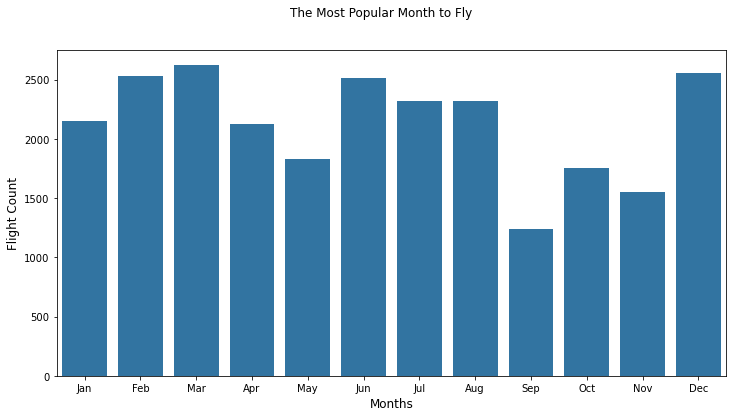

In [7]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('The Most Popular Month to Fly')

pit_month = pit_delays['Month'].value_counts().sort_index()

#Monthly flight data
sns.barplot(x=pit_month.index, y=pit_month, color=base_color)
ax.set_xticklabels(labels=months)
ax.set_ylabel('Flight Count', fontsize=12)
ax.set_xlabel('Months', fontsize=12);

#### b. Most Popular Day of the Week <a name="popular_day"></a>

Text(0.5, 0, 'Day of the Week')

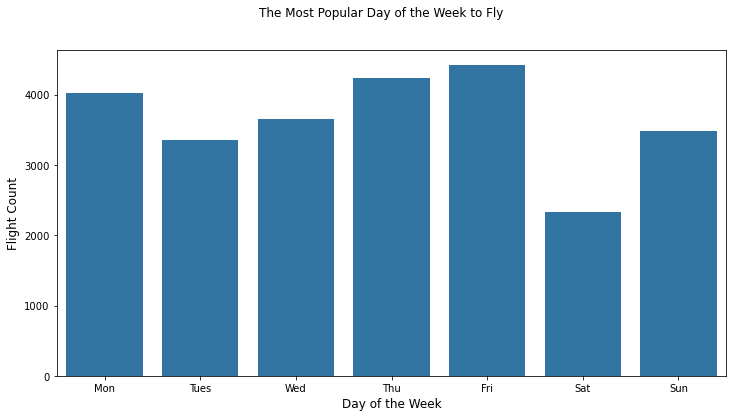

In [8]:
days_of_week = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('The Most Popular Day of the Week to Fly')

pit_day = pit_delays['DayOfWeek'].value_counts().sort_index()

#Plot the 2007 day of week flight data
sns.barplot(x=pit_day.index, y=pit_day, color=base_color)
ax.set_xticklabels(labels=days_of_week)
ax.set_ylabel('Flight Count', fontsize=12)
ax.set_xlabel('Day of the Week', fontsize=12);